In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor


In [11]:
#reading the csv data
data=pd.read_csv(r'../data//housing.csv')


In [12]:
#shows mini representation of our data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()
#rows has some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# drop.dropna drops all rows with NA , inplace=true will save the entire result
data.dropna(inplace=True)

In [6]:
data.info()
#data does not have any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
#splitting dataset for training , testing , and evaluation
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
train_data=x_train.join(y_train)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11879,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284,INLAND,101600.0
10694,-117.74,33.62,16.0,1889.0,590.0,686.0,537.0,3.4706,<1H OCEAN,241700.0
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY,500001.0
20190,-119.17,34.26,10.0,3654.0,541.0,1638.0,551.0,6.1885,NEAR OCEAN,267300.0
19308,-122.88,38.34,20.0,3404.0,628.0,1641.0,585.0,5.0574,<1H OCEAN,276200.0
...,...,...,...,...,...,...,...,...,...,...
7616,-118.22,33.86,16.0,8732.0,1489.0,3944.0,1493.0,5.1948,<1H OCEAN,203500.0
961,-121.91,37.68,20.0,1804.0,254.0,831.0,260.0,6.1770,<1H OCEAN,262900.0
17987,-121.94,37.29,22.0,2593.0,637.0,1249.0,623.0,3.7500,<1H OCEAN,212500.0
7183,-118.19,34.05,29.0,855.0,199.0,785.0,169.0,2.6964,<1H OCEAN,122200.0


ANALYSISING THE DATASET

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

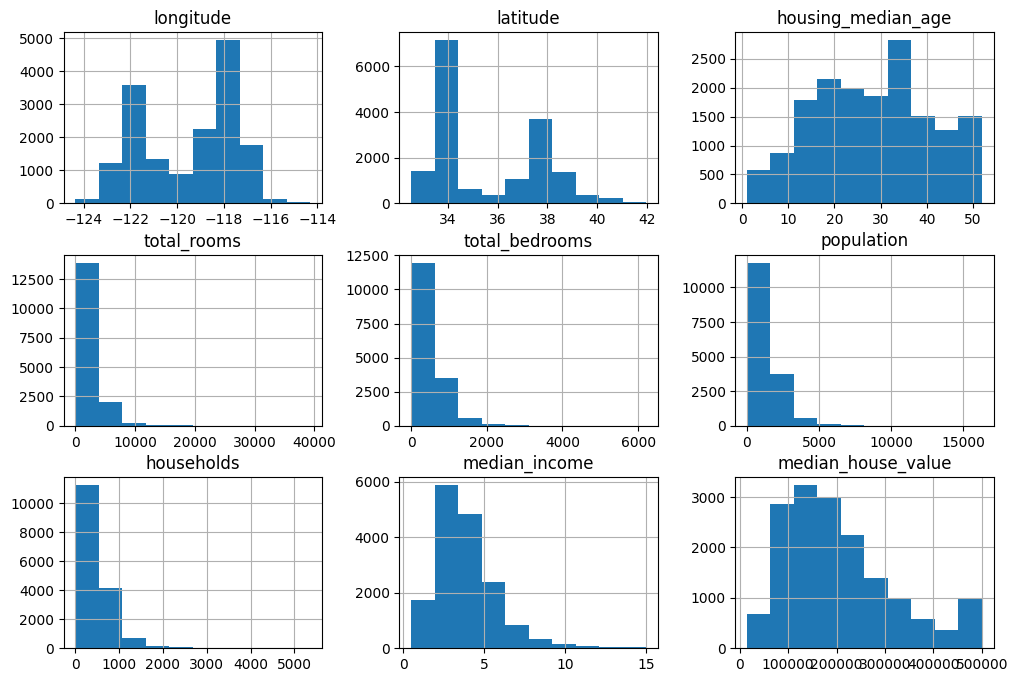

In [15]:
train_data.hist(figsize=(12,8))

CORELEATION HEATMAP 

In [16]:
train_data.corr()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14380\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924520,-0.108710,0.044102,0.069756,0.102922,0.056002,-0.016491,-0.045282
latitude,-0.924520,1.000000,0.012631,-0.035373,-0.066574,-0.112198,-0.071157,-0.078944,-0.144562
housing_median_age,-0.108710,0.012631,1.000000,-0.357770,-0.318775,-0.302472,-0.301245,-0.126173,0.098289
total_rooms,0.044102,-0.035373,-0.357770,1.000000,0.929751,0.866188,0.918188,0.205670,0.137434
total_bedrooms,0.069756,-0.066574,-0.318775,0.929751,1.000000,0.887794,0.979916,-0.001735,0.051962
population,0.102922,-0.112198,-0.302472,0.866188,0.887794,1.000000,0.916333,0.011483,-0.020881
households,0.056002,-0.071157,-0.301245,0.918188,0.979916,0.916333,1.000000,0.019832,0.068209
median_income,-0.016491,-0.078944,-0.126173,0.205670,-0.001735,0.011483,0.019832,1.000000,0.692346
median_house_value,-0.045282,-0.144562,0.098289,0.137434,0.051962,-0.020881,0.068209,0.692346,1.000000


C:\Users\Dell\AppData\Local\Temp\ipykernel_14380\2457733934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

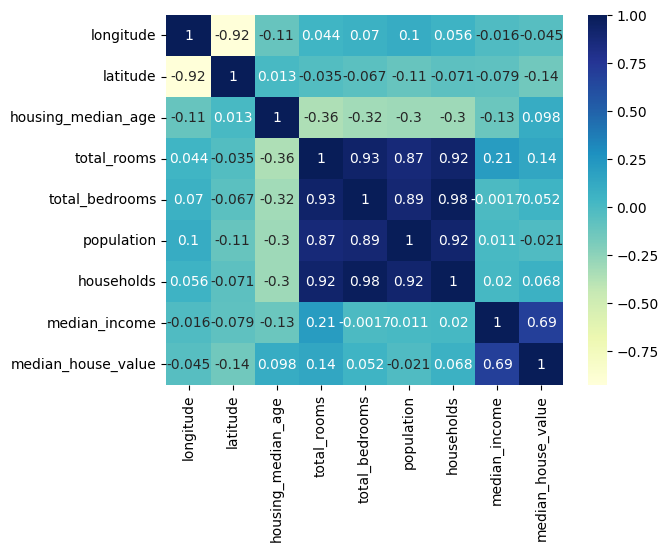

In [17]:
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

DATA PRE-PROCESSING

In [18]:
#Skewed data is data that creates an uneven curve distribution on a graph 
# data of histogram shown above is skewwed.
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

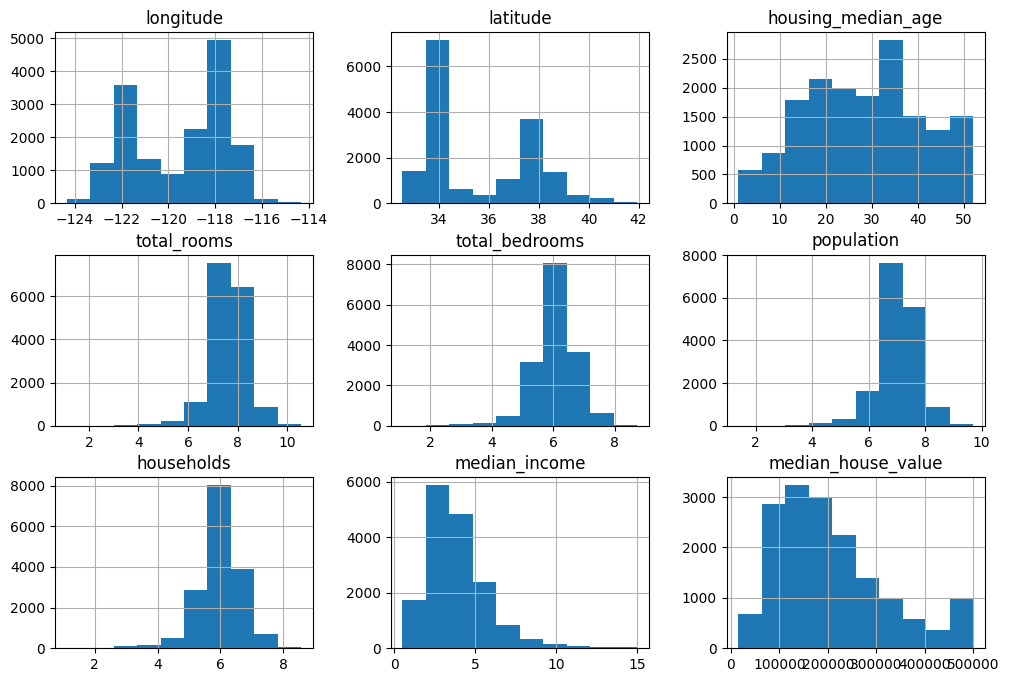

In [19]:
train_data.hist(figsize=(12,8))

changing ocean proximity to a int value 

In [20]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7259
INLAND        5217
NEAR OCEAN    2086
NEAR BAY      1782
ISLAND           2
Name: ocean_proximity, dtype: int64

In [21]:
#one hot encoding
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11879,0,1,0,0,0
10694,1,0,0,0,0
15698,0,0,0,1,0
20190,0,0,0,0,1
19308,1,0,0,0,0
...,...,...,...,...,...
7616,1,0,0,0,0
961,1,0,0,0,0
17987,1,0,0,0,0
7183,1,0,0,0,0


In [22]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11879,-117.38,33.98,52.0,7.729735,6.349139,7.063048,6.224558,2.0284,101600.0,0,1,0,0,0
10694,-117.74,33.62,16.0,7.544332,6.381816,6.532334,6.287859,3.4706,241700.0,1,0,0,0,0
15698,-122.46,37.79,52.0,6.802395,4.574711,5.720312,4.709530,14.2959,500001.0,0,0,0,1,0
20190,-119.17,34.26,10.0,8.203851,6.295266,7.401842,6.313548,6.1885,267300.0,0,0,0,0,1
19308,-122.88,38.34,20.0,8.133000,6.444131,7.403670,6.373320,5.0574,276200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,-118.22,33.86,16.0,9.074864,7.306531,8.280204,7.309212,5.1948,203500.0,1,0,0,0,0
961,-121.91,37.68,20.0,7.498316,5.541264,6.723832,5.564520,6.1770,262900.0,1,0,0,0,0
17987,-121.94,37.29,22.0,7.860956,6.458338,7.130899,6.436150,3.7500,212500.0,1,0,0,0,0
7183,-118.19,34.05,29.0,6.752270,5.298317,6.666957,5.135798,2.6964,122200.0,1,0,0,0,0


<Axes: >

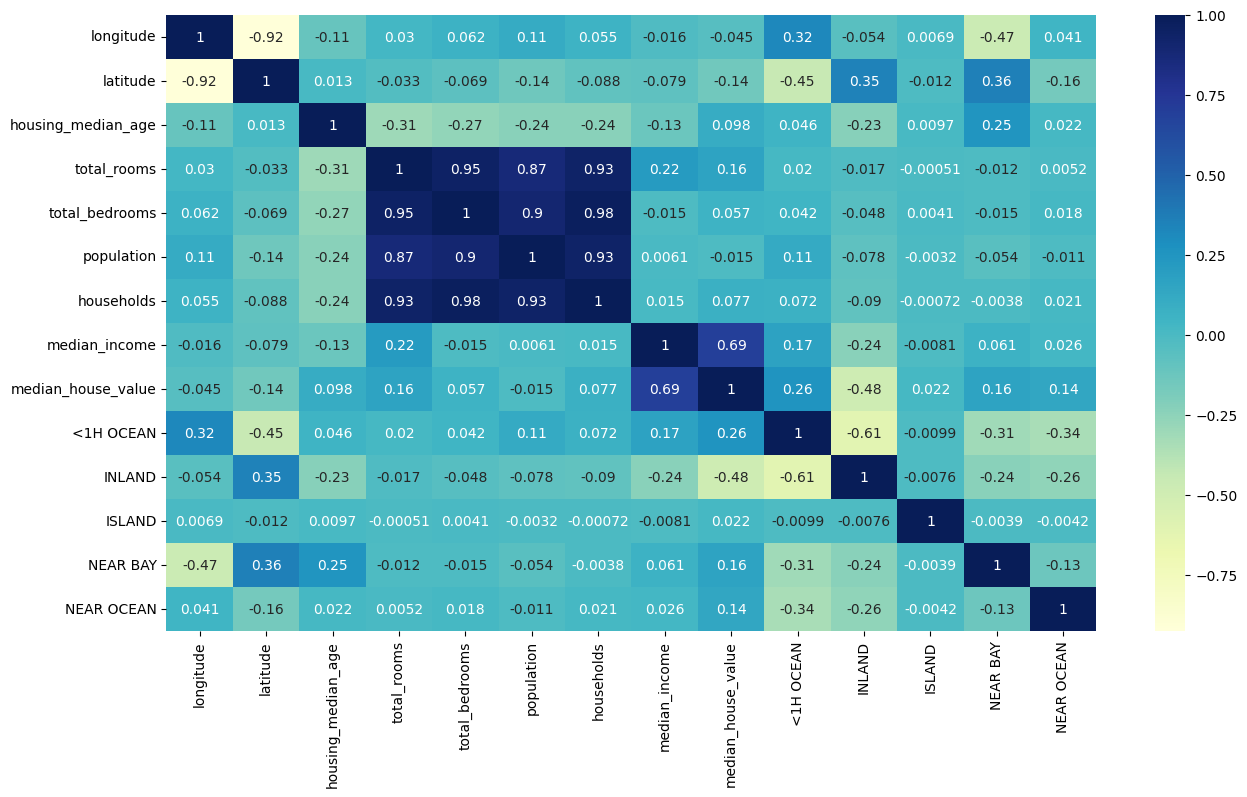

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

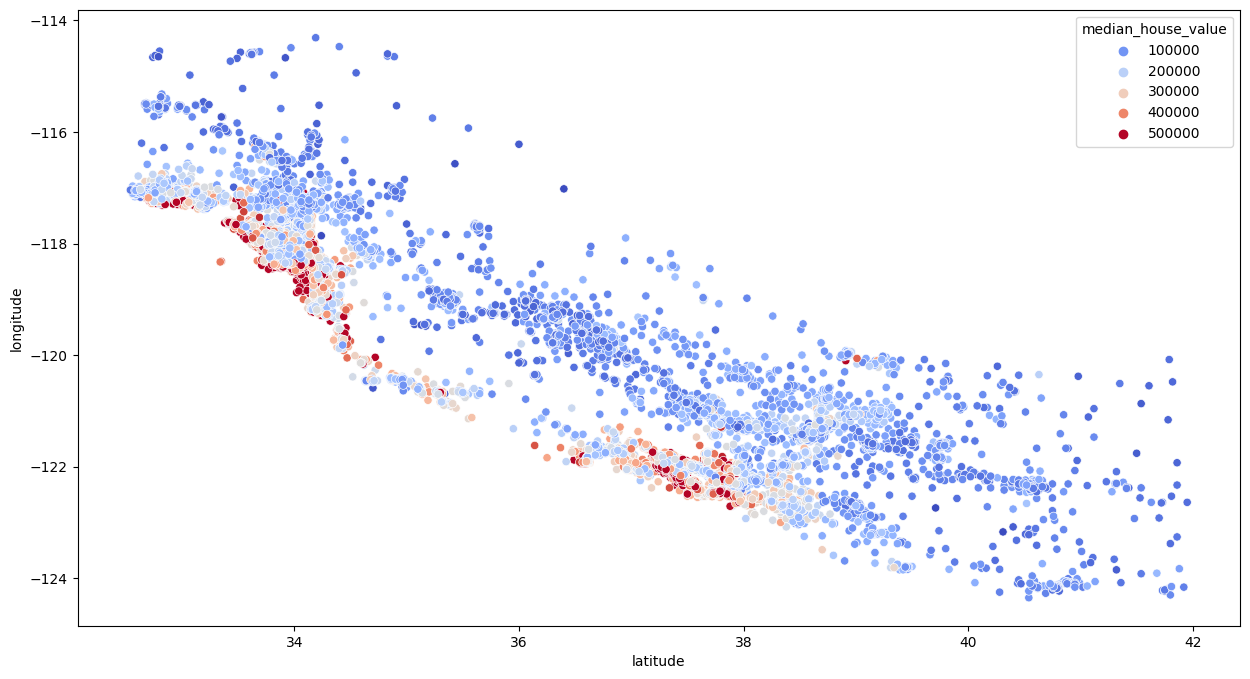

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

red = more expensive (closer to the water bodies)
blue = less expensive (closer to the inland)

In [26]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

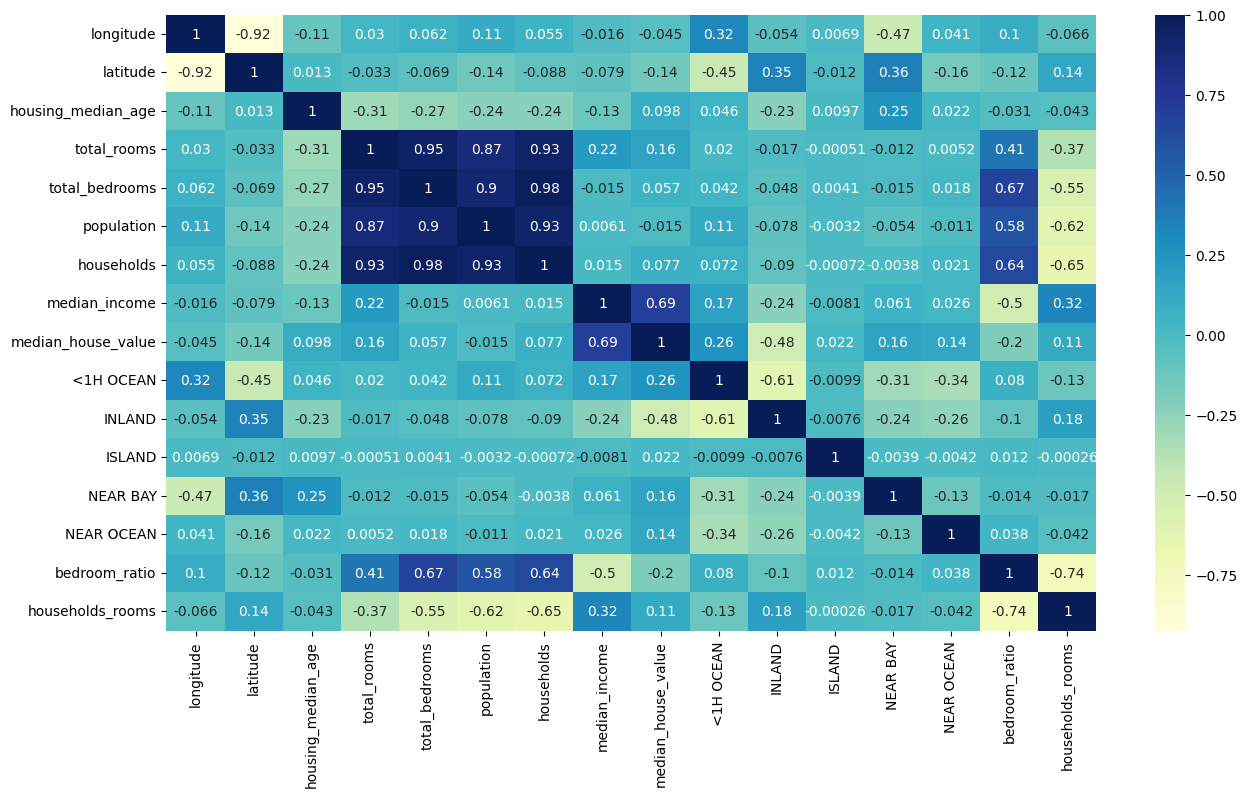

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

using ML models

In [28]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
11879,-117.38,33.98,52.0,7.729735,6.349139,7.063048,6.224558,2.0284,101600.0,0,1,0,0,0,0.821392,1.241813
10694,-117.74,33.62,16.0,7.544332,6.381816,6.532334,6.287859,3.4706,241700.0,1,0,0,0,0,0.845909,1.199825
15698,-122.46,37.79,52.0,6.802395,4.574711,5.720312,4.709530,14.2959,500001.0,0,0,0,1,0,0.672515,1.444389
20190,-119.17,34.26,10.0,8.203851,6.295266,7.401842,6.313548,6.1885,267300.0,0,0,0,0,1,0.767355,1.299404
19308,-122.88,38.34,20.0,8.133000,6.444131,7.403670,6.373320,5.0574,276200.0,1,0,0,0,0,0.792344,1.276101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,-118.22,33.86,16.0,9.074864,7.306531,8.280204,7.309212,5.1948,203500.0,1,0,0,0,0,0.805139,1.241565
961,-121.91,37.68,20.0,7.498316,5.541264,6.723832,5.564520,6.1770,262900.0,1,0,0,0,0,0.739001,1.347522
17987,-121.94,37.29,22.0,7.860956,6.458338,7.130899,6.436150,3.7500,212500.0,1,0,0,0,0,0.821572,1.221375
7183,-118.19,34.05,29.0,6.752270,5.298317,6.666957,5.135798,2.6964,122200.0,1,0,0,0,0,0.784672,1.314746


using "LINEAR REGRESSION MODEL"

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

In [30]:
x_train_s=scaler.fit_transform(x_train)

In [31]:
reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [34]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms']=test_data['total_rooms']/test_data['households']

#x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [35]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [41]:
x_test_s=scaler.transform(x_test)

model accuracy

In [ ]:
reg.score(x_test_s, y_test)

0.6559919980600273

In [ ]:
y_predict=reg.predict(x_test)

In [ ]:
y_predict(y_test,y_predict)

USING RANDOM FOREST MODEL

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train, y_train)


RandomForestRegressor()

In [42]:
# after x_train_s (data transformation)
forest.score(x_test_s,y_test)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.07741949609680765

using k-fold validation 

In [43]:
from sklearn.model_selection import GridSearchCV

parameter_grid={
    'n_estimators':[3,10,30],
    'max_features':[2,4,6,8]
}
# forest_val = RandomForestRegressor()
grid_search=GridSearchCV(forest,parameter_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
best_forest=grid_search.best_estimator_
best_forest.score(x_test_s,y_test)


0.813825743855953

imporving the accuracy by increasing k

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid_f={
    'n_estimators':[100,200,300],
    'min_samples_split':[2,4],
    'max_depth':[None,4,8]
}
# forest_val = RandomForestRegressor()
grid_search=GridSearchCV(forest,parameter_grid_f,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(x_train,y_train)

In [ ]:
best_forest=grid_search.best_estimator_
best_forest.score(x_test,y_test)

In [ ]:
xgbooster_model=XGBRegressor()

In [ ]:
xgbooster_model.fit(x_train,y_train)

NameError: name 'x_train' is not defined

Prediction on training data

In [ ]:
training_data_prediction=xgbooster_model.predict(x_train)

finidng r-square error and absolute error

In [ ]:
from sklearn import metrics

In [ ]:
score_1=metrics.r2_score(y_train,training_data_prediction)

fininding mean absolute error

In [ ]:
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)